In [1]:
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split

# Load preprocessed dataset
df = pd.read_csv("../data/processed/cleaned_fake_news.csv")

X = df['content']
y = df['label']

# Train-test split (same random_state so it's consistent)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Load model and vectorizer
clf = joblib.load("../models/logistic_regression.pkl")
tfidf = joblib.load("../models/tfidf_vectorizer.pkl")

# Transform test set
X_test_tfidf = tfidf.transform(X_test.fillna(""))

In [2]:
y_pred = clf.predict(X_test_tfidf)

Accuracy: 0.9878619153674832
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4284
           1       0.99      0.99      0.99      4696

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



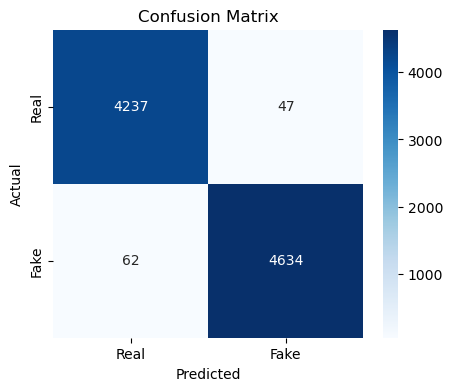

In [3]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [6]:
import joblib

# Load models
log_reg = joblib.load("../models/logistic_regression.pkl")
nb = joblib.load("../models/naive_bayes.pkl")
rf = joblib.load("../models/random_forest.pkl")

# Load vectorizer
tfidf = joblib.load("../models/tfidf_vectorizer.pkl")

models = {
    "Logistic Regression": log_reg,
    "Naive Bayes": nb,
    "Random Forest": rf
}

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []

for name, model in models.items():
    y_pred = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append([name, acc, prec, rec, f1])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision (Fake)", "Recall (Fake)", "F1 (Fake)"])
print(results_df)

                 Model  Accuracy  Precision (Fake)  Recall (Fake)  F1 (Fake)
0  Logistic Regression  0.987862          0.989959       0.986797   0.988376
1          Naive Bayes  0.928174          0.930683       0.932070   0.931376
2        Random Forest  0.996771          0.996595       0.997232   0.996913


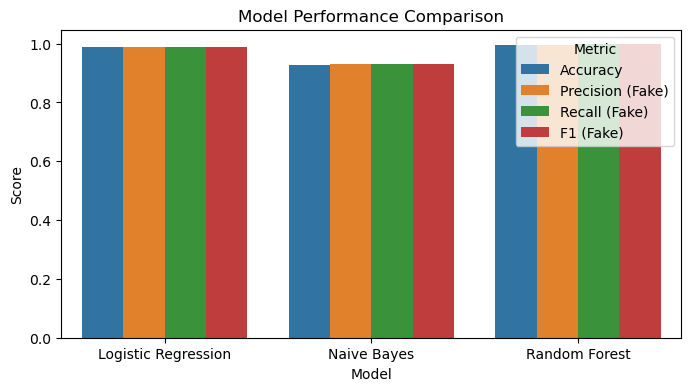

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.barplot(data=results_df.melt("Model", var_name="Metric", value_name="Score"),
            x="Model", y="Score", hue="Metric")
plt.title("Model Performance Comparison")
plt.show()
